# PREDICTIVE MODELING FOR INSURANCE CLAIM PROBABILITY BASED ON COMPREHENSIVE CAR POLICY FEATURES AND SAFETY RATINGS


### Develop a predictive model that assesses the claim probability for car insurance policies. The objective would be to understand the factors that influence claim frequency and severity in the period of six months and enable insurance companies to better assess risk and determine appropriate premiums for policyholders.


##### Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


#### Loading the data

In [2]:
df = pd.read_csv("Insurance_data.csv")
df.head(10)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
5,ID00006,1.018709,0.07,0.519231,C6,13051,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
6,ID00007,0.097992,0.16,0.403846,C7,6112,4,B2,M5,Diesel,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
7,ID00008,0.509085,0.14,0.423077,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
8,ID00009,0.282394,0.07,0.298077,C7,6112,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
9,ID00010,0.566255,0.04,0.442308,C9,17804,1,B2,M7,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,0


In [3]:
df.shape

(58592, 44)

In [4]:
#Checking for datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

##### All column datatypes identified correctly

In [5]:
#Checking for null values
df.isna().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

##### No missing values present

In [6]:
# Since policy id column is of no use for us, we can drop it
df = df.drop('policy_id', axis=1)

In [7]:
df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


### Checking for imbalance

In [8]:
# Checking if the data is imbalanced or not (checking target column)

df['is_claim'].value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

###### Above we can see that one class is way too higher than the other class. This means are data is imbalanced

### Encoding the categorical columns having same values:

In [9]:
obj = list(df.select_dtypes(include='object').columns)
obj

['area_cluster',
 'segment',
 'model',
 'fuel_type',
 'max_torque',
 'max_power',
 'engine_type',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'transmission_type',
 'steering_type',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert']

In [10]:
for i in obj:
#     print (i)
    print(df[i].value_counts())

C8     13654
C2      7342
C5      6979
C3      6101
C14     3660
C13     3423
C10     3155
C9      2734
C7      2167
C12     1589
C1      1468
C11     1212
C19      952
C6       890
C15      771
C4       665
C17      492
C16      401
C21      379
C18      242
C22      207
C20      109
Name: area_cluster, dtype: int64
B2         18314
A          17321
C2         14018
B1          4173
C1          3557
Utility     1209
Name: segment, dtype: int64
M1     14948
M4     14018
M6     13776
M8      4173
M7      2940
M3      2373
M9      2114
M5      1598
M10     1209
M2      1080
M11      363
Name: model, dtype: int64
Petrol    20532
CNG       20330
Diesel    17730
Name: fuel_type, dtype: int64
113Nm@4400rpm     17796
60Nm@3500rpm      14948
250Nm@2750rpm     14018
82.1Nm@3400rpm     4173
91Nm@4250rpm       2373
200Nm@1750rpm      2114
200Nm@3000rpm      1598
85Nm@3000rpm       1209
170Nm@4000rpm       363
Name: max_torque, dtype: int64
88.50bhp@6000rpm     17796
40.36bhp@6000rpm     14948
113

In [11]:
# Encoding columns having Yes No Values:
cols = ['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']

#### Using Label Encoder

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in cols:
    df[i]= le.fit_transform(df[i])

In [13]:
df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,...,0,0,0,1,0,0,0,1,0,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,...,0,0,0,1,0,0,0,1,0,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,0,0,0,1,0,0,0,1,0,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,...,1,1,1,1,1,1,1,1,2,0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,...,0,1,1,1,0,1,1,1,2,0


In [14]:
df['is_brake_assist'].value_counts()

1    32177
0    26415
Name: is_brake_assist, dtype: int64

##### Yes has been encoded as 1 and No has been encoded as 0

##### Checking again for datatypes

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  int64  
 5   make                              58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

#### Checking for outliers in  numerical columns:

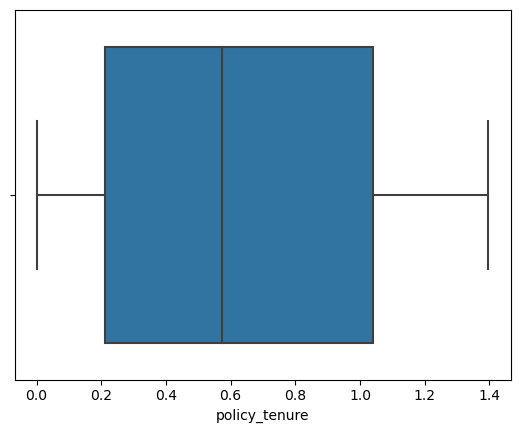

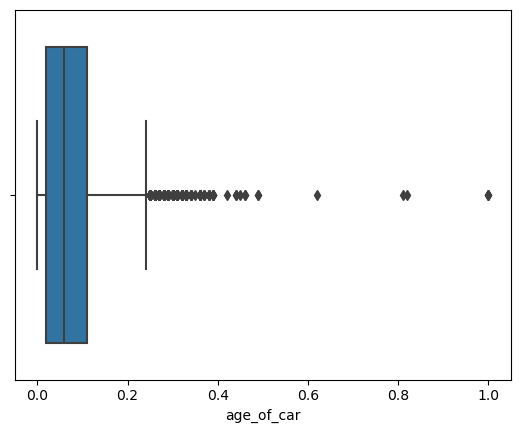

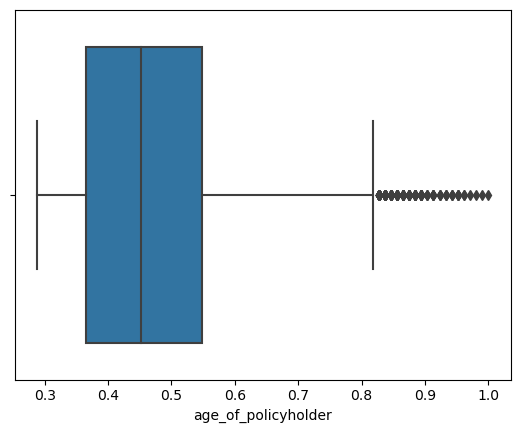

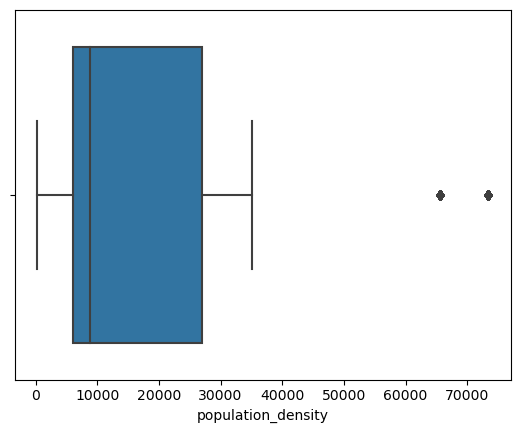

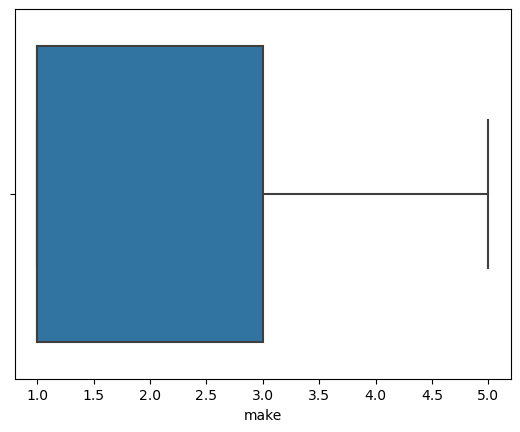

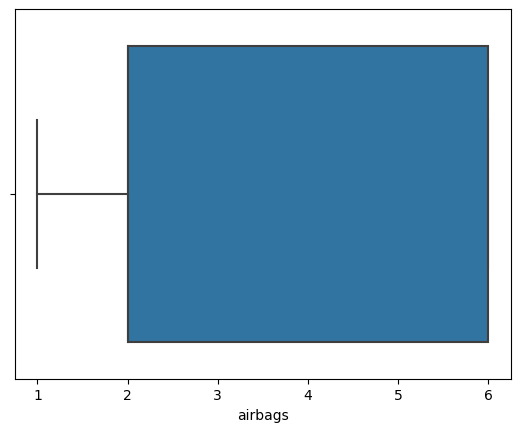

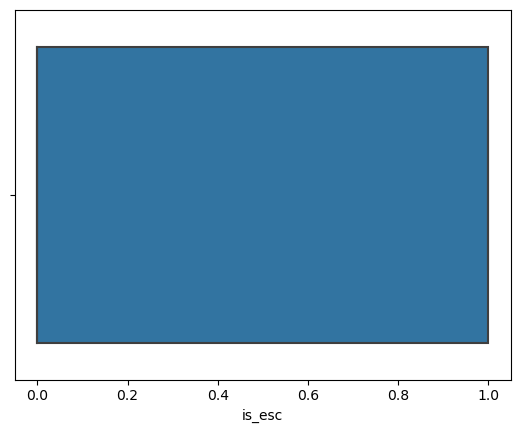

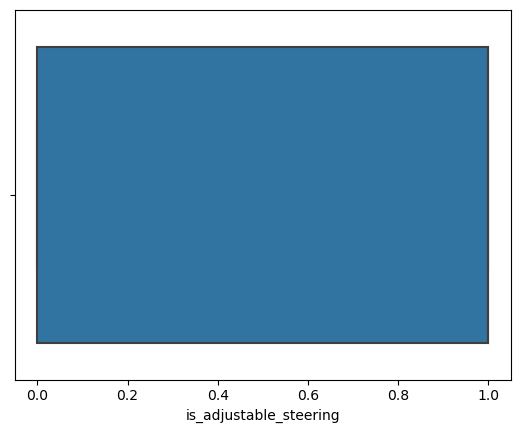

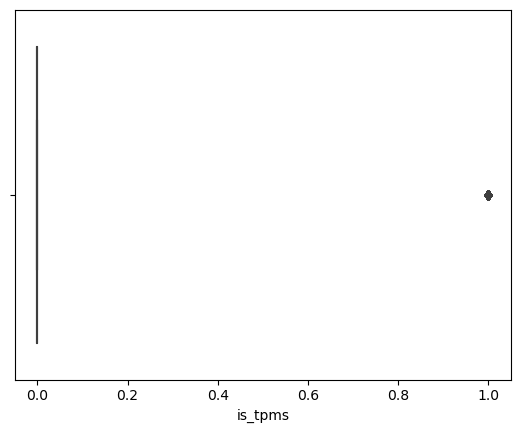

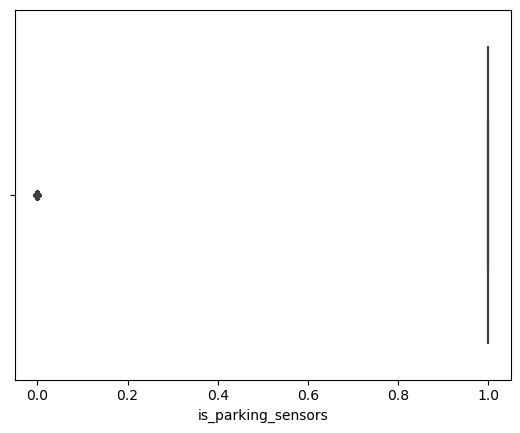

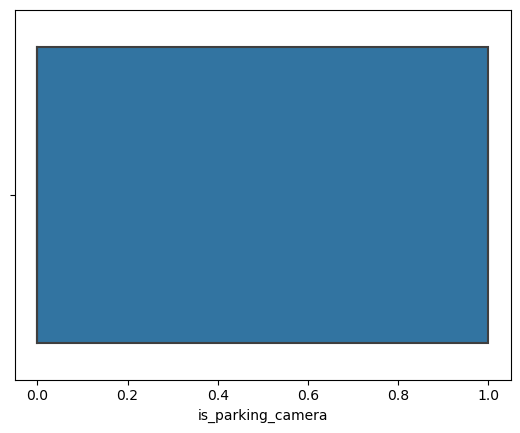

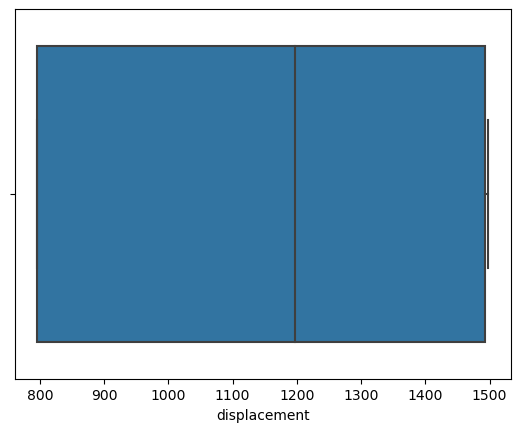

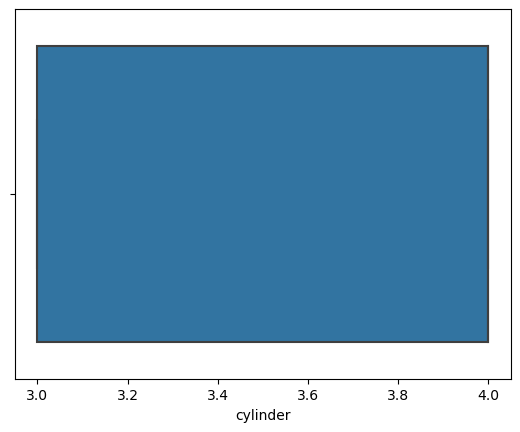

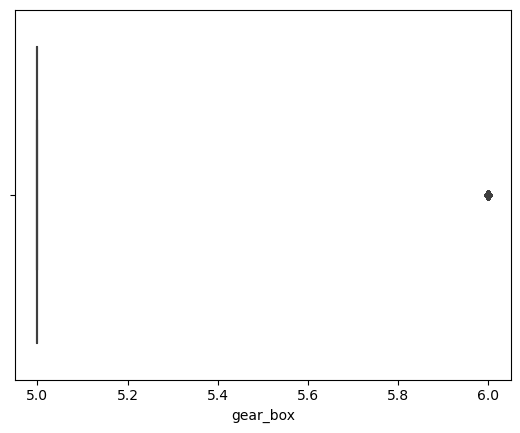

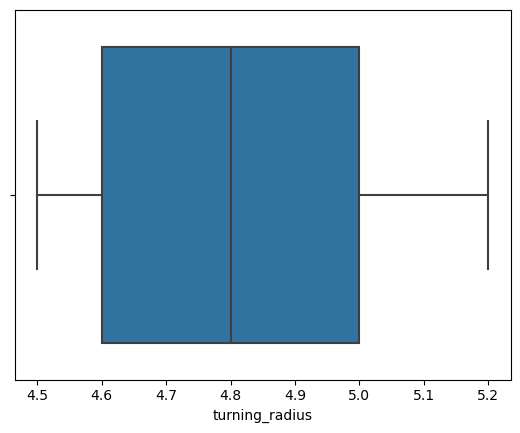

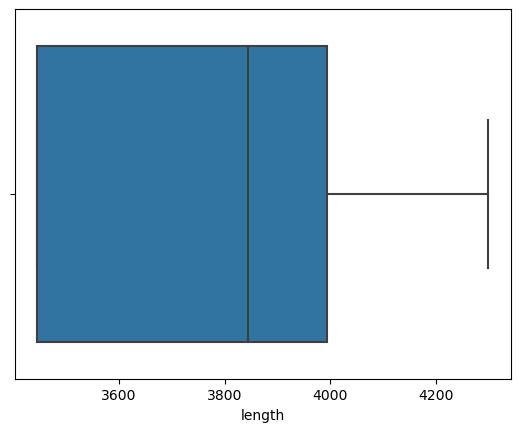

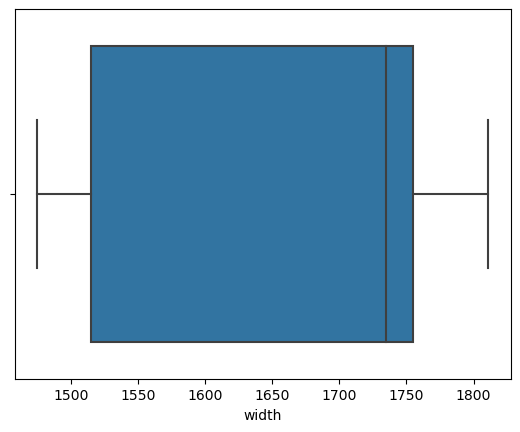

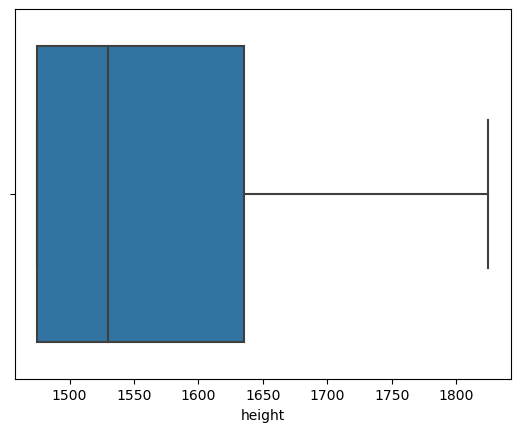

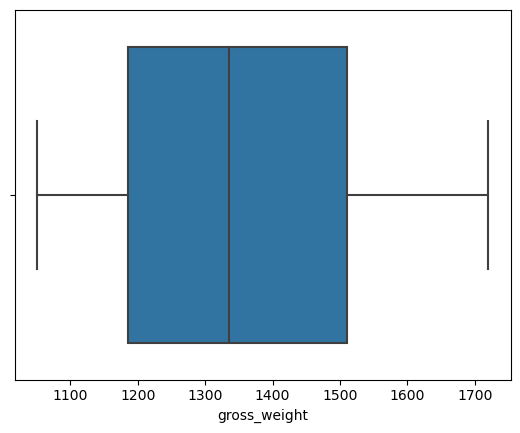

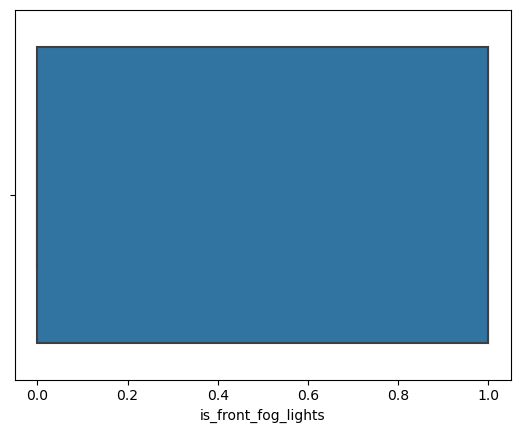

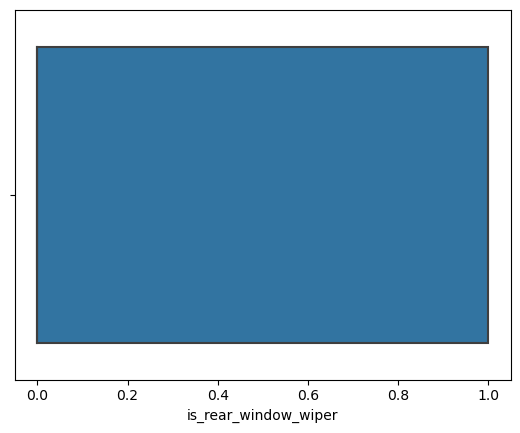

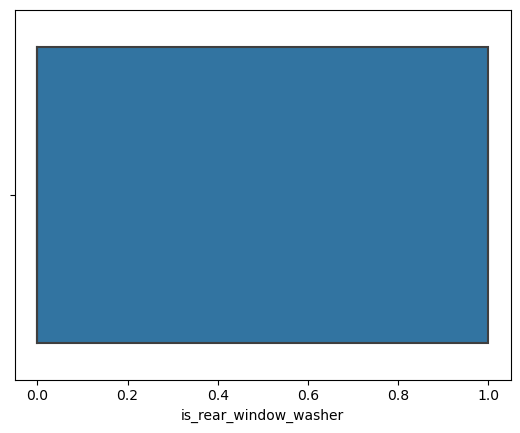

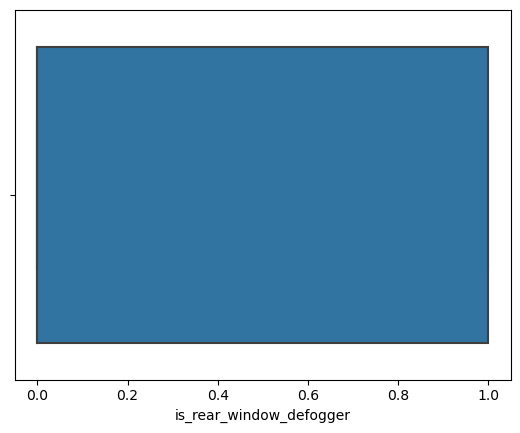

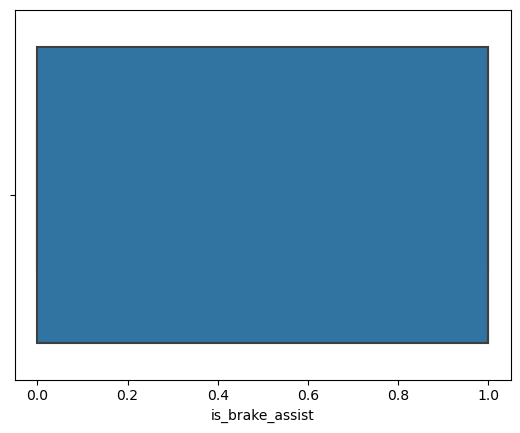

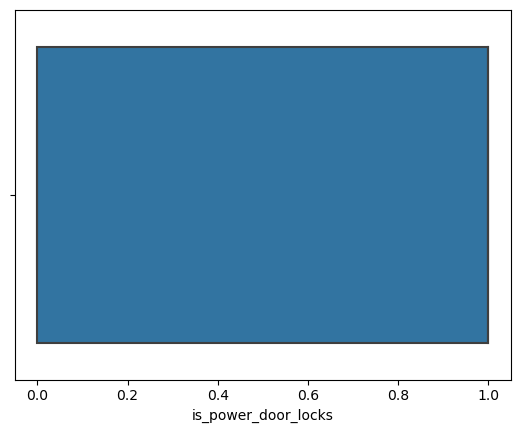

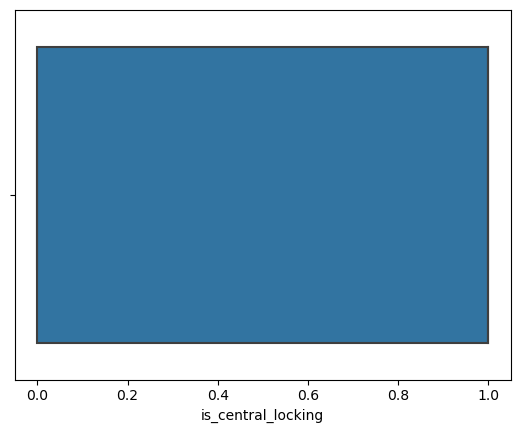

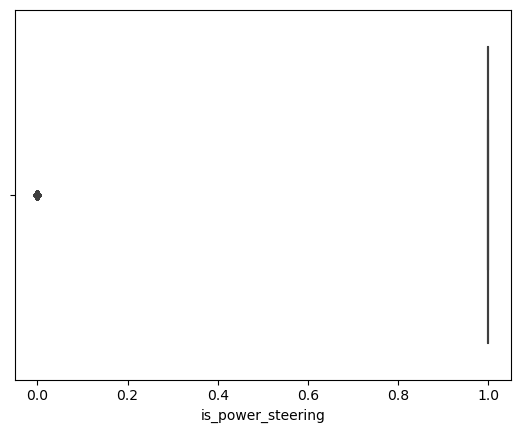

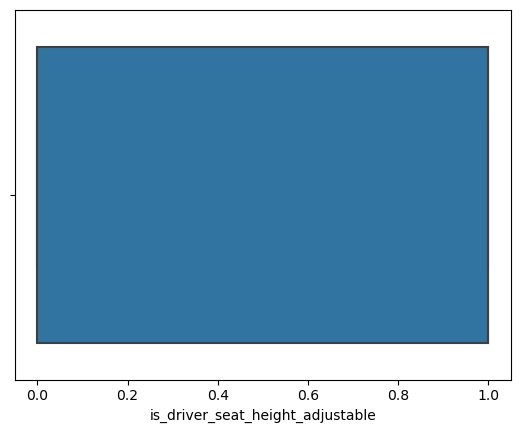

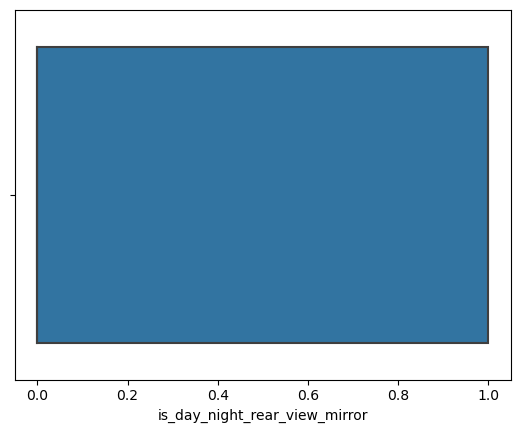

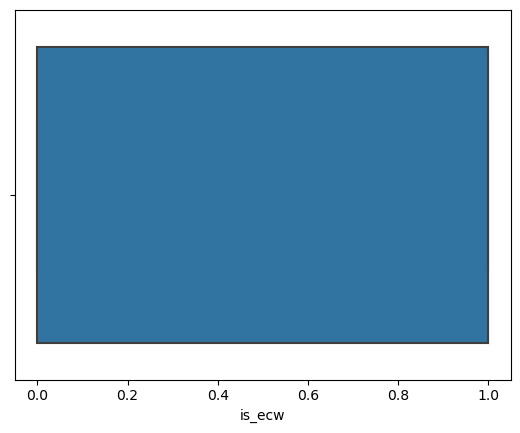

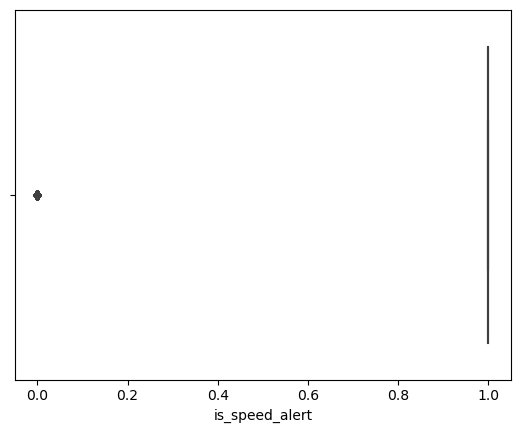

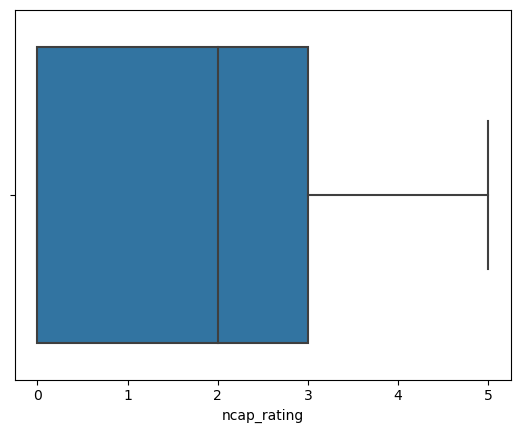

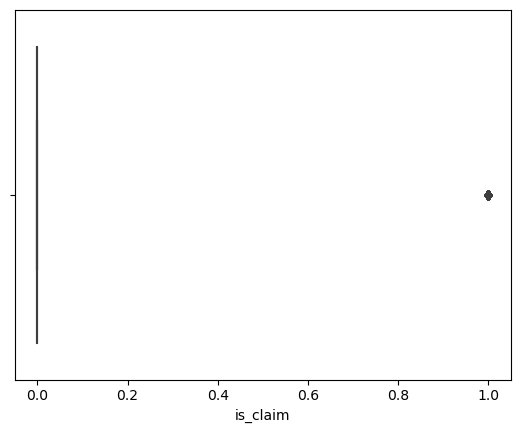

In [16]:
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  int64  
 5   make                              58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

### Treating the outliers

In [18]:
colm = ['age_of_car', 'age_of_policyholder', 'population_density']

def outliers(colm):
    q1=df[colm].quantile(0.25)
    q3=df[colm].quantile(0.75)
    iqr = q3-q1
    upper = q3+1.5*iqr
    lower = q1-1.5*iqr
    df[colm].clip(lower, upper, inplace = True)
    
for i in (colm):
    outliers(i)

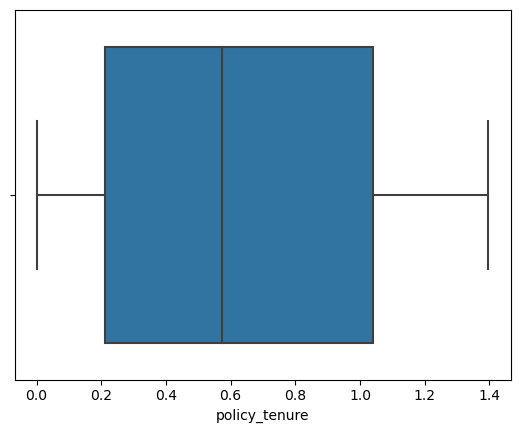

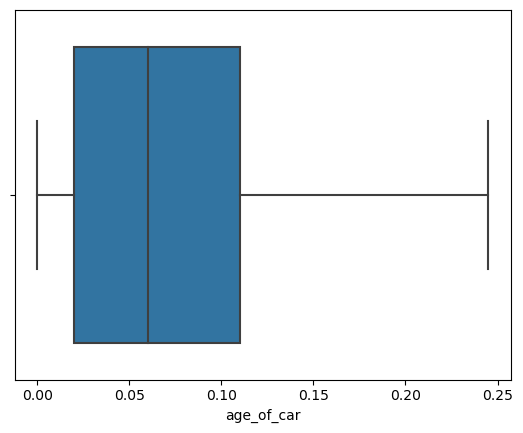

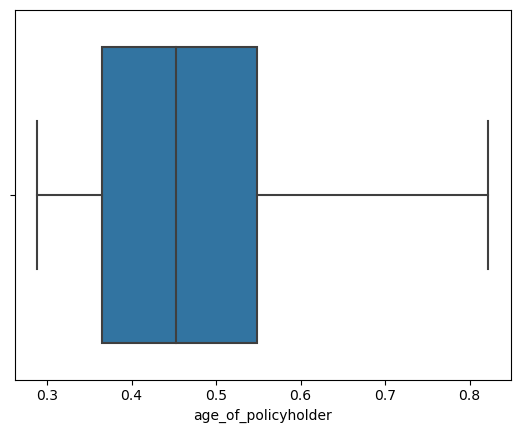

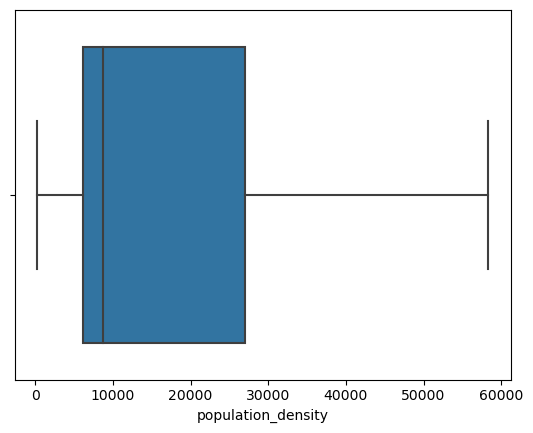

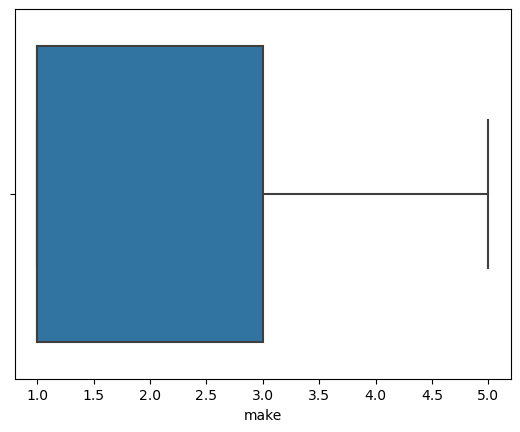

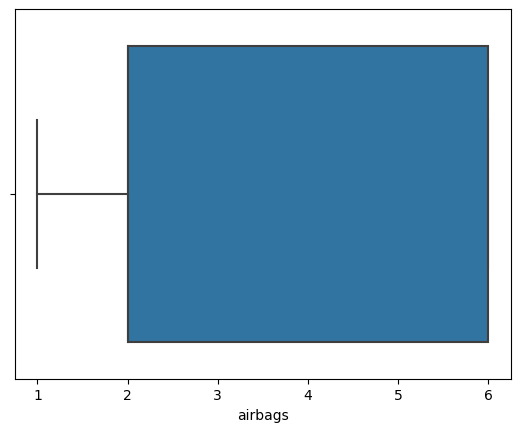

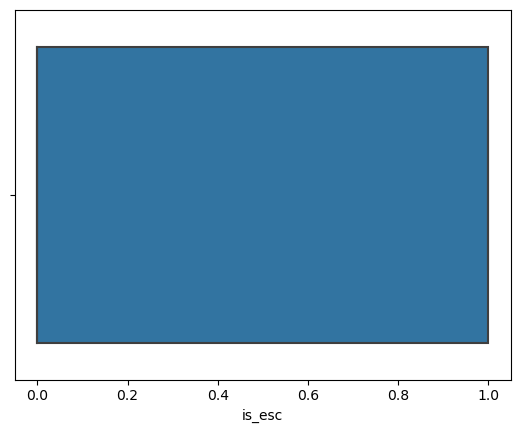

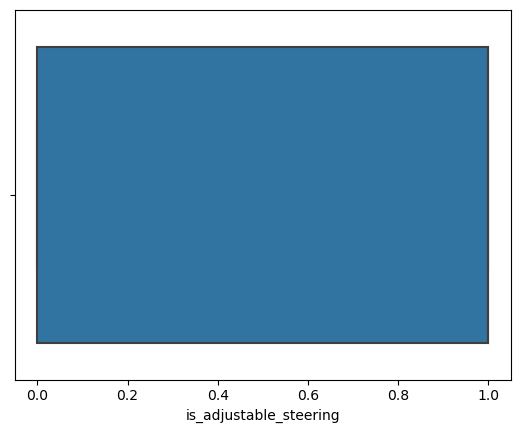

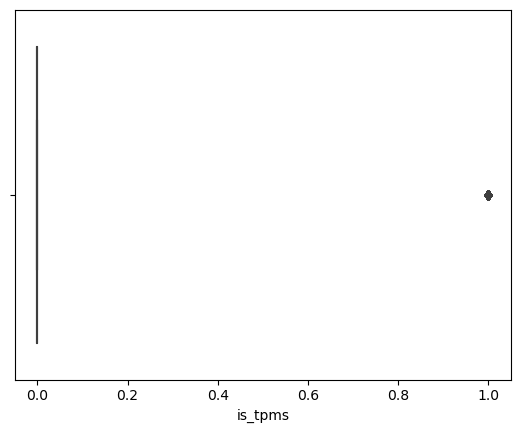

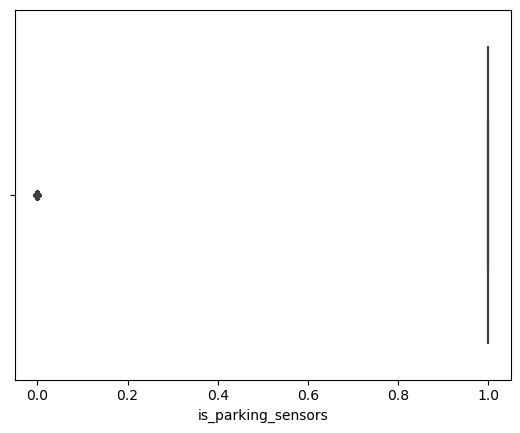

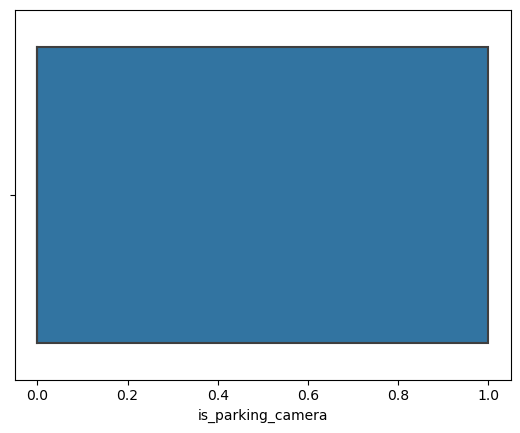

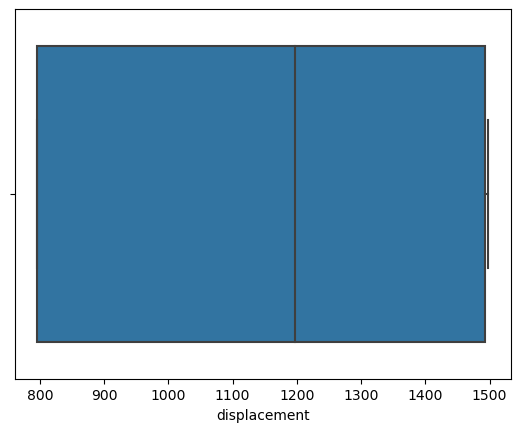

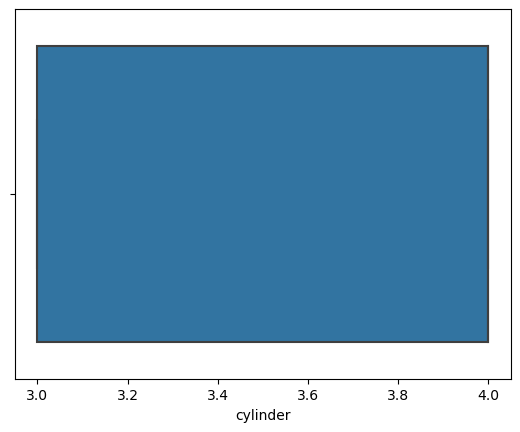

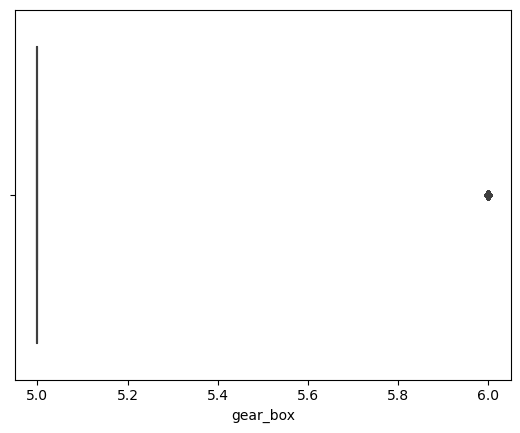

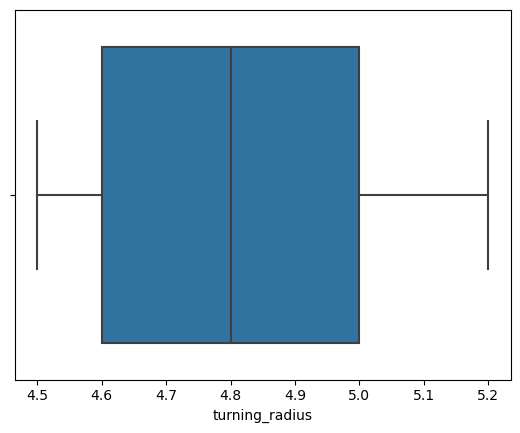

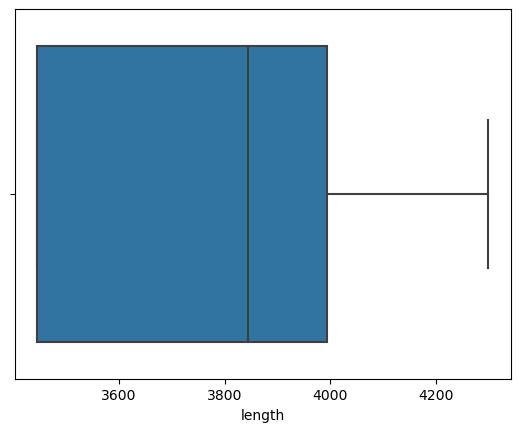

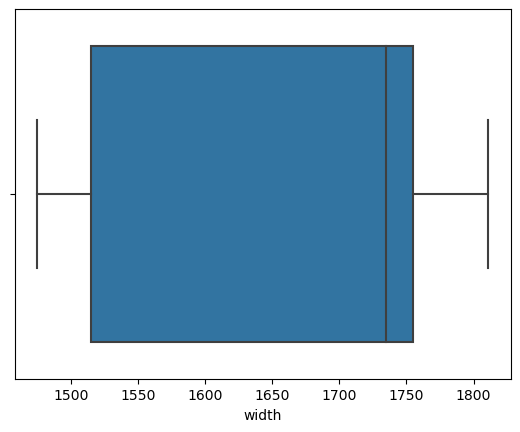

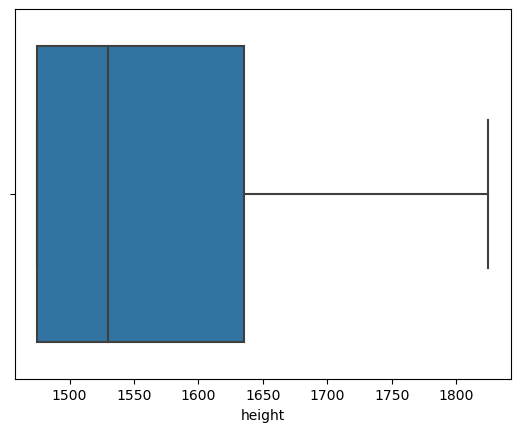

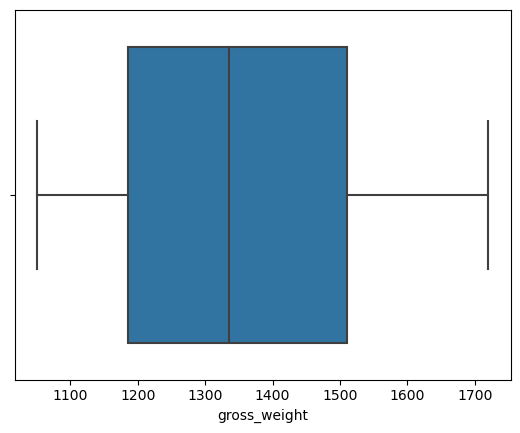

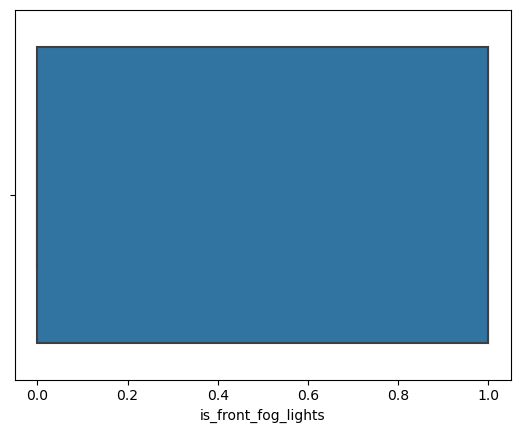

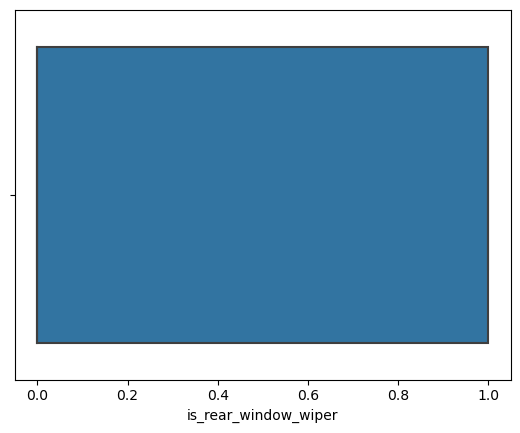

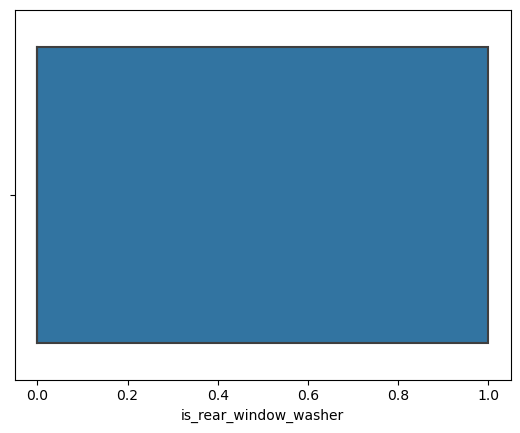

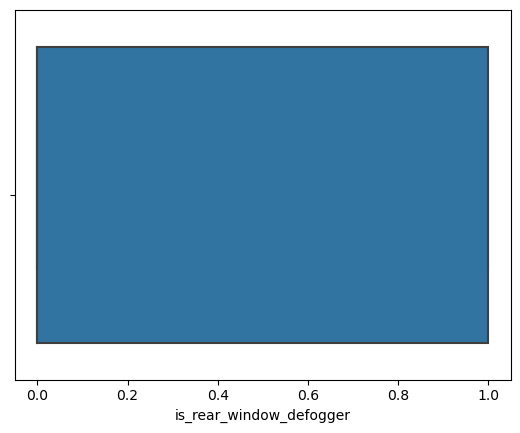

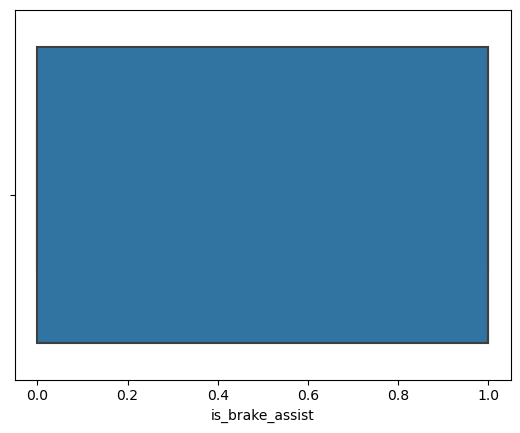

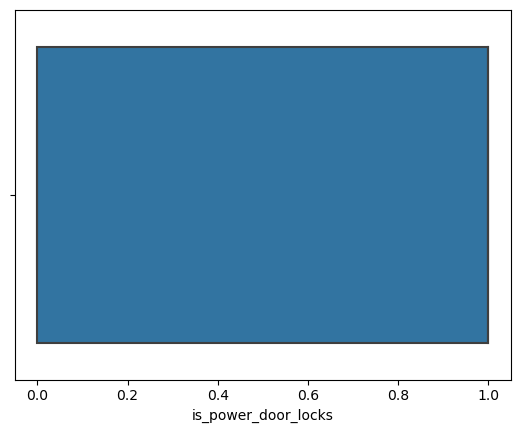

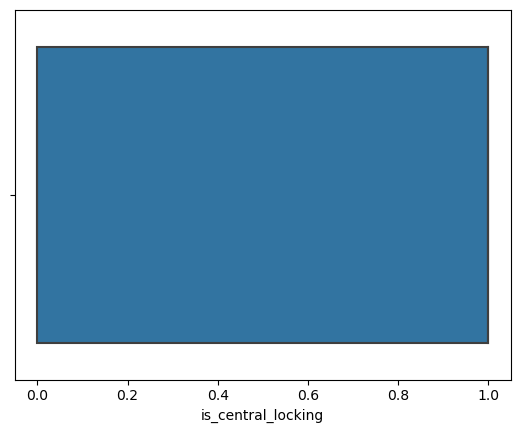

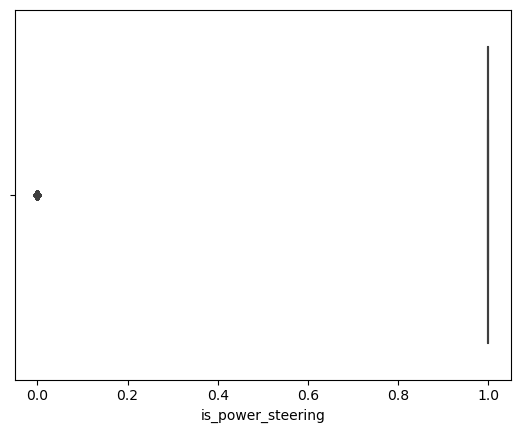

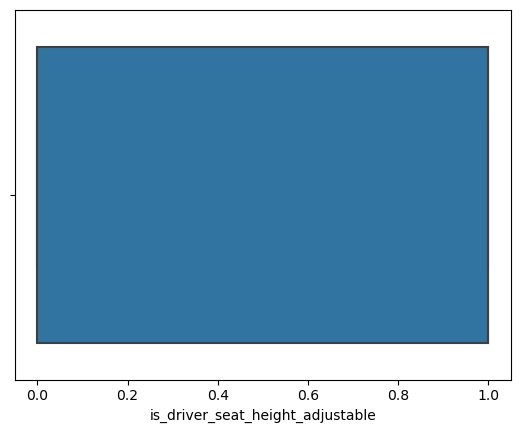

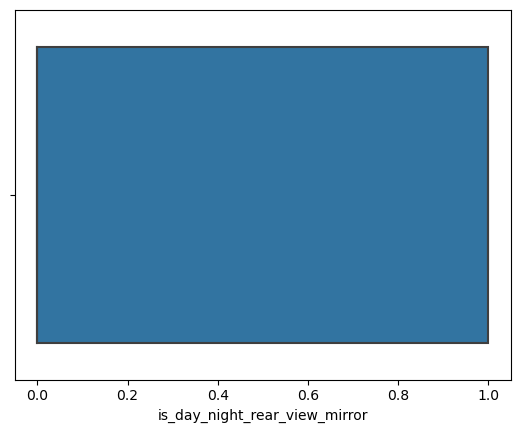

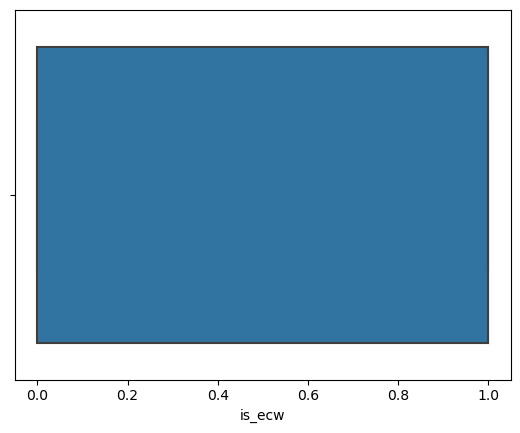

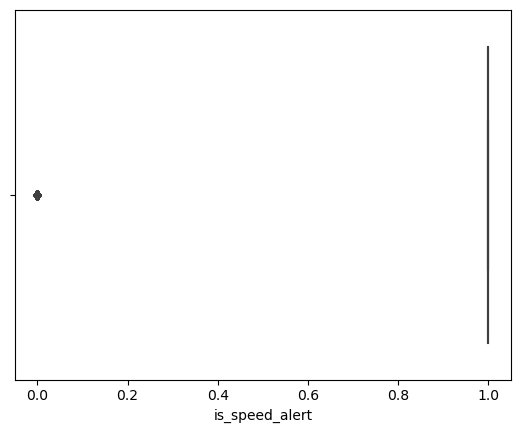

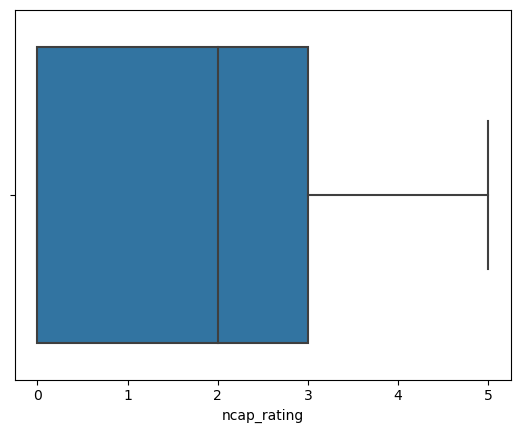

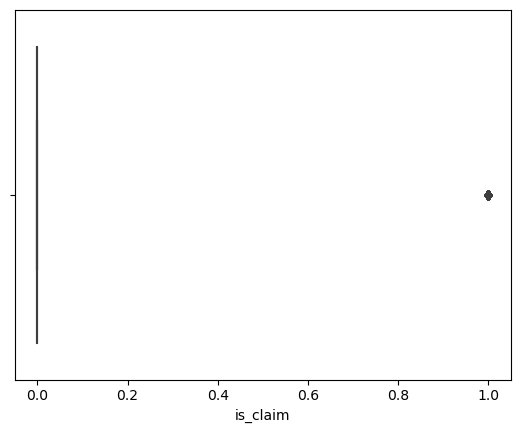

In [19]:
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

### We have treated outliers for the required columns. 
### We can now go for further steps.

#### Checking for duplicate values:

In [20]:
df.duplicated().sum()

0

#### No duplicate values are present

## Visualizations:

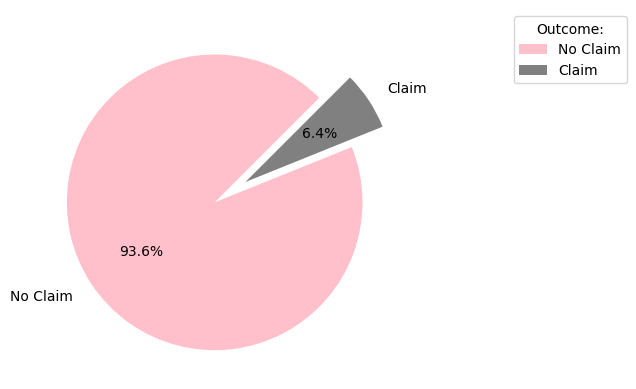

In [21]:
#Visualizing the Target Variable.

fig = plt.figure(facecolor='white')

ax = fig.add_subplot(1, 1, 1, facecolor='white')

plt.pie(df['is_claim'].value_counts(), labels=['No Claim', 'Claim'], radius=1, colors=['pink', 'grey'],
        autopct='%1.1f%%', explode=[0.1, 0.15], labeldistance=1.15, startangle=45)
#         textprops={'fontsize': 15, 'fontweight': 'bold'}

plt.legend(title='Outcome:', loc='upper right', bbox_to_anchor=(1.6, 1))

fig.patch.set_facecolor('white')

plt.show()

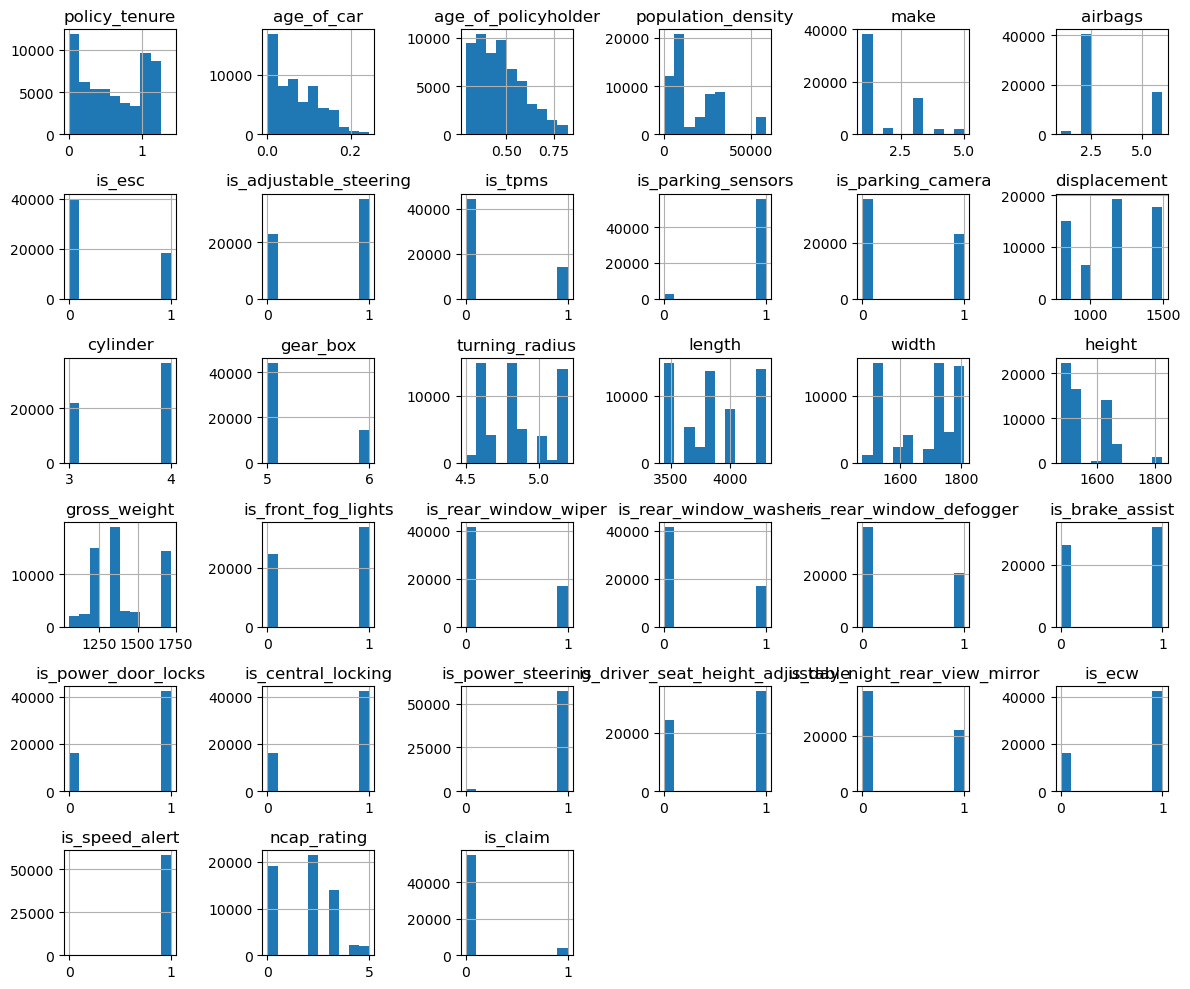

In [22]:
# Visualizing all columns.

df.hist(figsize=(12, 10))
plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

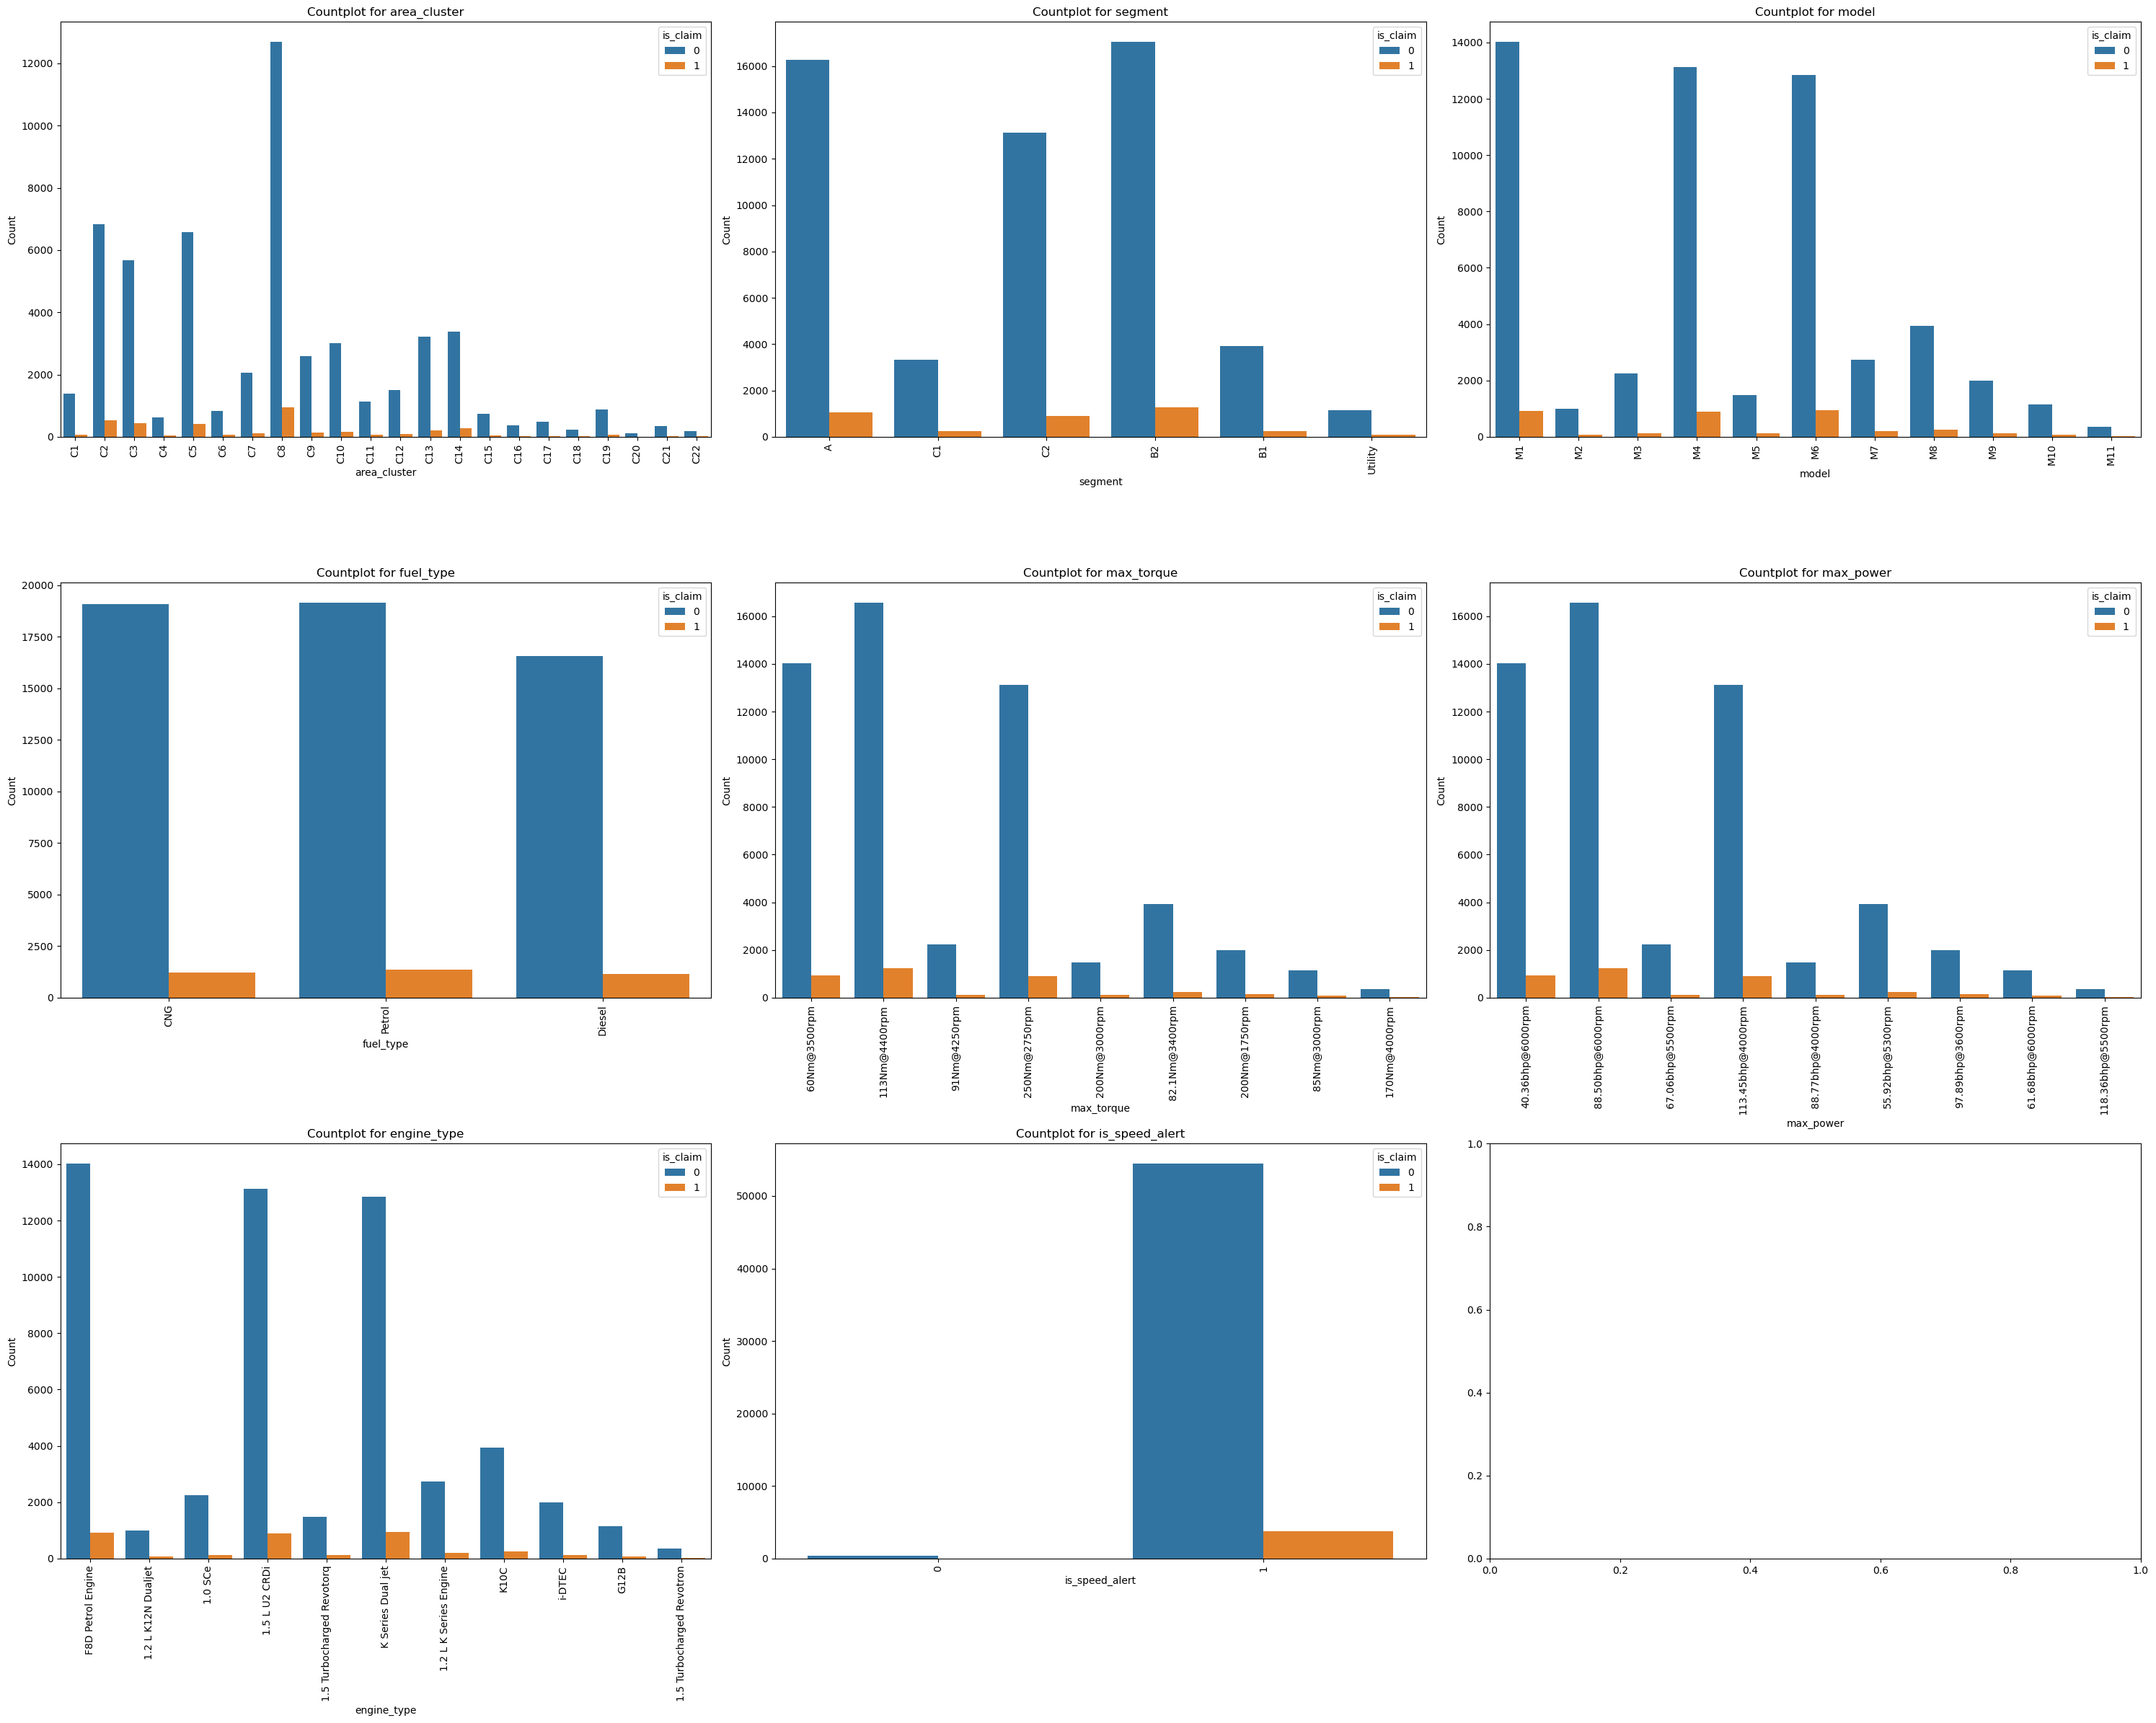

In [23]:
fig, axes = plt.subplots(3,3, figsize=(30,24))
axes = axes.flatten()

cols_1=['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque','max_power', 'engine_type', 'is_speed_alert']

for i, column in enumerate(cols_1):
    ax = axes[i]  # Select the current subplot

    # Plot the countplot
    sns.countplot(data=df, x=column, ax=ax, hue='is_claim')
    ax.set_title(f'Countplot for {column}')
    
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels if need
    
    
# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  float64
 5   make                              58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

## Data Pre-Processing:

#### Dealing with object columns which can't be directly encoded

In [25]:
# MaxTorque and MaxPower Columns have two components inside each row.
# MaxTorque- It's format is Torque@RPM. The relationship between Torque Rpm is higher the RPM, the more torque an engine can produce.
# MaxPower- It's format is power@RPM. Power divided by RPM gives the max power produced
 
    # What we'll do is extract these two components from each col and divide the two components from each col to get a single ratio value.

In [26]:
df['max_torque'].value_counts()

113Nm@4400rpm     17796
60Nm@3500rpm      14948
250Nm@2750rpm     14018
82.1Nm@3400rpm     4173
91Nm@4250rpm       2373
200Nm@1750rpm      2114
200Nm@3000rpm      1598
85Nm@3000rpm       1209
170Nm@4000rpm       363
Name: max_torque, dtype: int64

In [27]:
# The first component before '@' is Torque and the next component is RPM. So we'll extract these using regular expressions.

In [28]:
import re

df["Torque"] = df['max_torque'].apply(lambda x: re.findall(r'\d+\.?\d*(?=Nm)', x)[0])
df['RPM'] = df['max_torque'].apply(lambda x: re.findall(r'\d+\.?\d*(?=rpm)', x)[0])

# Now we'll change its datatype to numeric so we can perform division on these
df["Torque"] = pd.to_numeric(df["Torque"])
df["RPM"]= pd.to_numeric(df["RPM"])

# Now we'll divide these components together to get a new column
df["Maximum_Torque"] = df["Torque"]/df["RPM"]

In [29]:
# Doing the same for MaxPower column
df["Power"] = df['max_power'].apply(lambda x: re.findall(r'\d+\.?\d*(?=bhp)', x)[0])
df['RPM2'] = df['max_power'].apply(lambda x: re.findall(r'\d+', x)[-1])

# Changing data types
df["Power"] = pd.to_numeric(df["Power"])
df["RPM2"] = pd.to_numeric(df["RPM2"])

# Dividing these components
df["Maximum_Power"] = df["Power"]/df["RPM2"]

In [30]:
# Dropping the unnecessary columns now:
df.drop('max_torque', axis = 1, inplace= True)
df.drop('Torque', axis = 1, inplace= True)
df.drop('RPM', axis = 1, inplace= True)
df.drop('max_power', axis = 1, inplace= True)
df.drop('Power', axis = 1, inplace= True)
df.drop('RPM2', axis = 1, inplace= True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  float64
 5   make                              58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   engine_type                       58592 non-null  object 
 10  airbags                           58592 non-null  int64  
 11  is_esc                            58592 non-null  int32  
 12  is_a

### These two columns have now been converted to float datatype.

<AxesSubplot:>

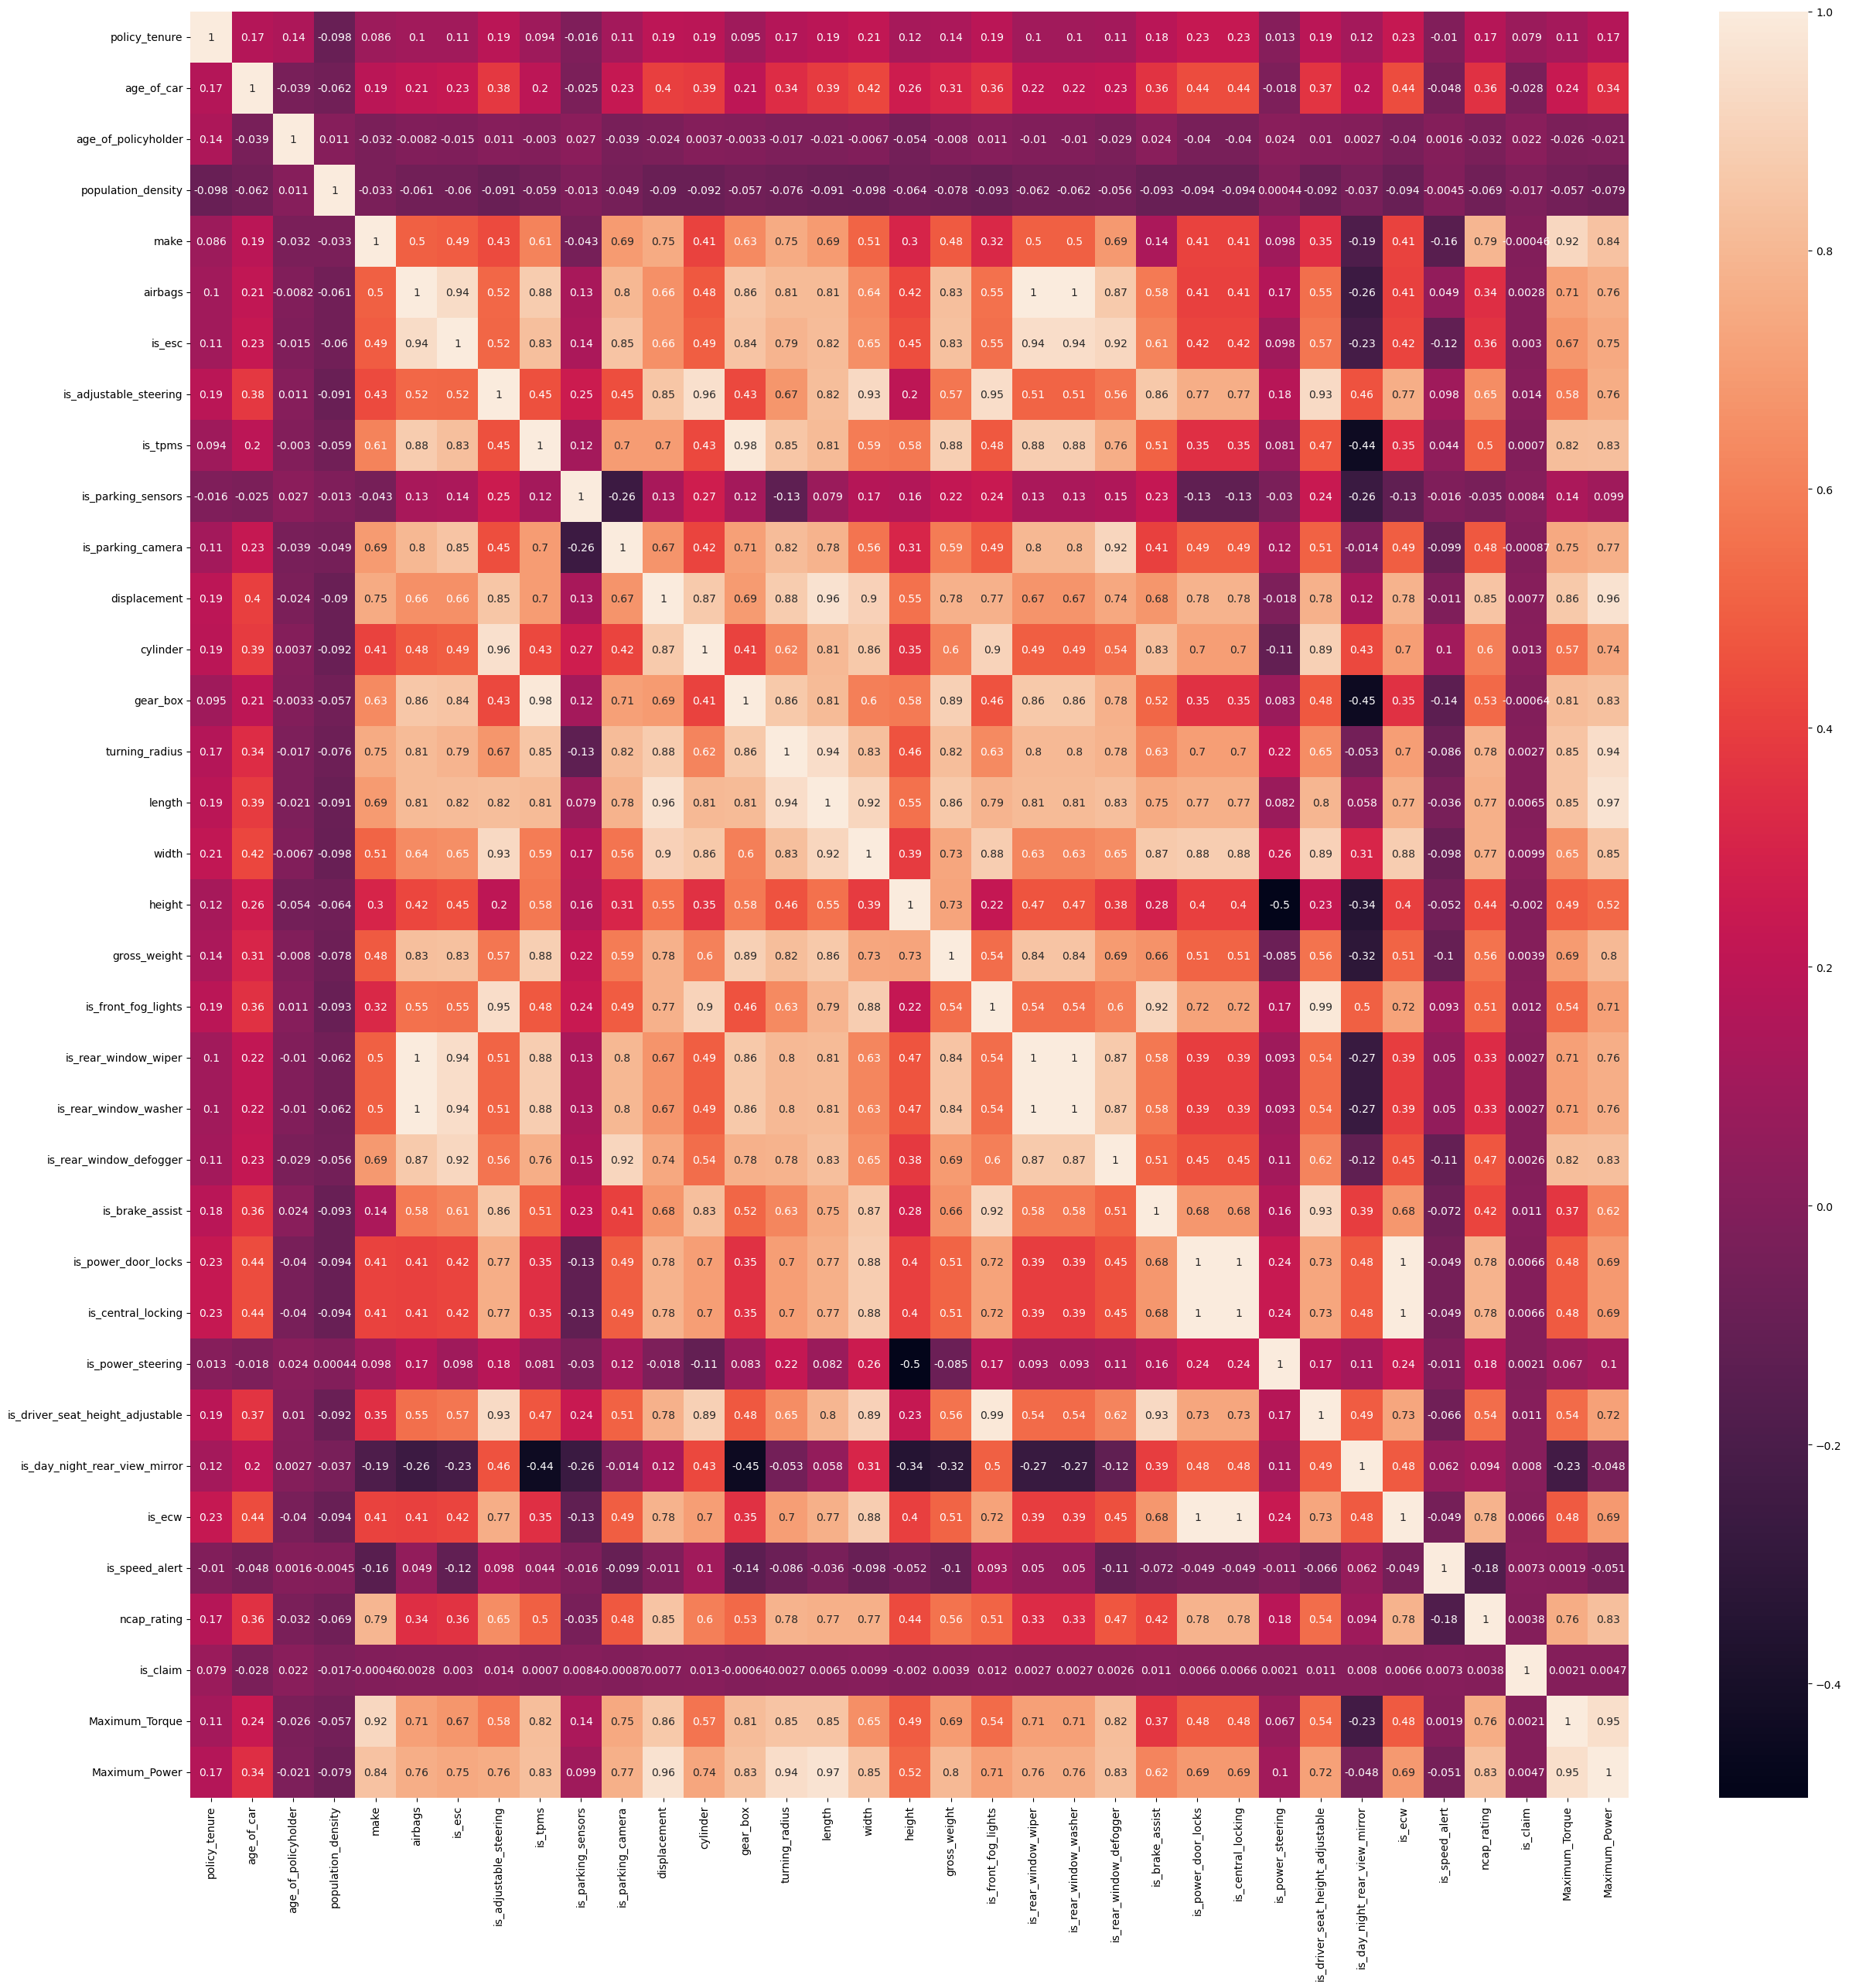

In [32]:
# Correlation analysis:
plt.figure(figsize = (30,30))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap= None)


In [ ]:
# Almost all the features have multi-colinearity and are weakly related to the target variable. To solve this, we can go for PCA at a later stage in this project.

## ENCODING THE REMAINING OBJECT COLUMNS:

### We can now use one-hot encoder for the remaining object columns:

In [33]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['area_cluster', 'segment', 'model', 'fuel_type', 'engine_type',
       'rear_brakes_type', 'transmission_type', 'steering_type'],
      dtype='object')

In [34]:
df= pd.get_dummies(df, columns=cat_cols,drop_first=True)

In [35]:
df.head(2)

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,...,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,rear_brakes_type_Drum,transmission_type_Manual,steering_type_Manual,steering_type_Power
0,0.515874,0.05,0.644231,4990.0,1,2,0,0,0,1,...,0,1,0,0,0,0,1,1,0,1
1,0.672619,0.02,0.375000,27003.0,1,2,0,0,0,1,...,0,1,0,0,0,0,1,1,0,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 87 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   policy_tenure                          58592 non-null  float64
 1   age_of_car                             58592 non-null  float64
 2   age_of_policyholder                    58592 non-null  float64
 3   population_density                     58592 non-null  float64
 4   make                                   58592 non-null  int64  
 5   airbags                                58592 non-null  int64  
 6   is_esc                                 58592 non-null  int32  
 7   is_adjustable_steering                 58592 non-null  int32  
 8   is_tpms                                58592 non-null  int32  
 9   is_parking_sensors                     58592 non-null  int32  
 10  is_parking_camera                      58592 non-null  int32  
 11  di

In [37]:
df.shape

(58592, 87)

##### Columns have been increased from 44 to 87 as we used One-Hot Encoder.

## Splitting features and target

In [38]:
X = df.drop('is_claim', axis = 1)
y = df['is_claim']

In [39]:
X

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,...,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,rear_brakes_type_Drum,transmission_type_Manual,steering_type_Manual,steering_type_Power
0,0.515874,0.05,0.644231,4990.0,1,2,0,0,0,1,...,0,1,0,0,0,0,1,1,0,1
1,0.672619,0.02,0.375000,27003.0,1,2,0,0,0,1,...,0,1,0,0,0,0,1,1,0,1
2,0.841110,0.02,0.384615,4076.0,1,2,0,0,0,1,...,0,1,0,0,0,0,1,1,0,1
3,0.900277,0.11,0.432692,21622.0,1,2,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.596403,0.11,0.634615,34738.0,2,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,8794.0,2,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
58588,1.199642,0.02,0.519231,7788.0,1,2,0,0,0,1,...,0,1,0,0,0,0,1,1,0,1
58589,1.162273,0.05,0.451923,34738.0,1,2,0,0,0,1,...,0,1,0,0,0,0,1,1,0,1
58590,1.236307,0.14,0.557692,8794.0,1,2,0,1,0,1,...,0,0,0,1,0,0,1,1,0,0


In [40]:
y

0        0
1        0
2        0
3        0
4        0
        ..
58587    0
58588    0
58589    0
58590    0
58591    0
Name: is_claim, Length: 58592, dtype: int64

## Handling Data Imbalance

In [41]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X, y = ros.fit_resample(X, y)
print(y.value_counts())

0    54844
1    54844
Name: is_claim, dtype: int64


### Both the classes have now been balanced.

### Splitting columns into Train and Test Data

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

### Scaling the data using Standard Scaler

In [43]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)    

### Most of the columns in this dataset are showing multicolinearity as we've seen above. In this case we can go for PCA. 

In [44]:
from sklearn.decomposition import PCA
pca1 = PCA(.95)
x_pca = pca1.fit_transform(x_train)
x_pca_test = pca1.transform(x_test)
x_pca.shape

(87750, 29)

In [45]:
explained_var = pca1.explained_variance_ratio_
explained_var

array([0.26613546, 0.11653837, 0.06429906, 0.05475873, 0.04882042,
       0.04123987, 0.03671231, 0.03228278, 0.02978766, 0.02605693,
       0.02393032, 0.01468703, 0.01332058, 0.01312674, 0.01266518,
       0.01235491, 0.01226735, 0.01212618, 0.01203148, 0.01192669,
       0.01184827, 0.01182685, 0.0117783 , 0.01177234, 0.01174035,
       0.0116971 , 0.01168953, 0.01166856, 0.01163464])

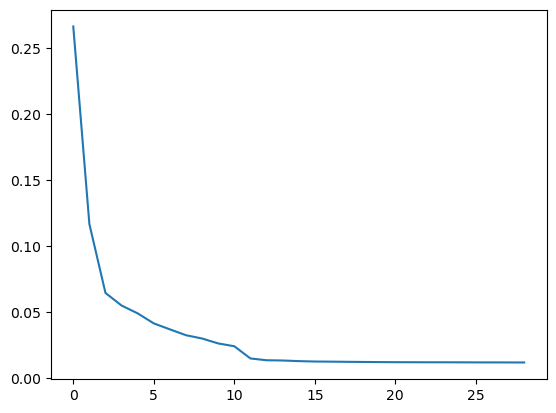

In [46]:
plt.plot(explained_var)
plt.show()

#### 29 out of all columns are giving 95% of the data information. Hence, we are going ahead with the features given by PCA.

## Since we're done with Data-Preprocessing, EDA and Train Test split, we can now go for model building.

In [47]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Model 1
### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression()
lr = lr_classifier.fit(x_pca, y_train)

In [49]:
#Prediction
y_pred_lr = lr_classifier.predict(x_pca_test)
y_pred_train_lr = lr_classifier.predict(x_pca)

In [50]:
# Checking Scores
print('For Test')
print(classification_report(y_test, y_pred_lr))

print('For Train')
print(classification_report(y_train, y_pred_train_lr))

For Test
              precision    recall  f1-score   support

           0       0.56      0.53      0.54     11006
           1       0.55      0.59      0.57     10932

    accuracy                           0.56     21938
   macro avg       0.56      0.56      0.56     21938
weighted avg       0.56      0.56      0.56     21938

For Train
              precision    recall  f1-score   support

           0       0.56      0.53      0.55     43838
           1       0.56      0.59      0.57     43912

    accuracy                           0.56     87750
   macro avg       0.56      0.56      0.56     87750
weighted avg       0.56      0.56      0.56     87750



## Model 2
### Decision Tress

In [51]:
from sklearn.tree import DecisionTreeClassifier

classifier2 = DecisionTreeClassifier(random_state=5, max_depth = 10, criterion = 'entropy')

dt = classifier2.fit(x_pca, y_train)
y_pred_dt = classifier2.predict(x_pca_test)
y_pred_train_dt = classifier2.predict(x_pca)

In [52]:
# Checking Scores
print('For Test')
print(classification_report(y_test, y_pred_dt))

print('For Train')
print(classification_report(y_train, y_pred_train_dt))

For Test
              precision    recall  f1-score   support

           0       0.71      0.44      0.54     11006
           1       0.59      0.82      0.69     10932

    accuracy                           0.63     21938
   macro avg       0.65      0.63      0.62     21938
weighted avg       0.65      0.63      0.62     21938

For Train
              precision    recall  f1-score   support

           0       0.72      0.45      0.55     43838
           1       0.60      0.82      0.69     43912

    accuracy                           0.64     87750
   macro avg       0.66      0.64      0.62     87750
weighted avg       0.66      0.64      0.62     87750



## Model 3
### Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

classifier4=RandomForestClassifier(n_estimators=250,max_leaf_nodes= 15,
                          max_depth=35, bootstrap=True)

rf = classifier4.fit(x_pca, y_train)

y_predrf = classifier4.predict(x_pca_test)
y_pred_trainrf = classifier4.predict(x_pca)

In [54]:
print("For Test")
print(classification_report(y_test, y_predrf))

print("For Train")
print(classification_report(y_train, y_pred_trainrf))

For Test
              precision    recall  f1-score   support

           0       0.63      0.56      0.59     11006
           1       0.60      0.66      0.63     10932

    accuracy                           0.61     21938
   macro avg       0.61      0.61      0.61     21938
weighted avg       0.61      0.61      0.61     21938

For Train
              precision    recall  f1-score   support

           0       0.62      0.57      0.59     43838
           1       0.60      0.66      0.63     43912

    accuracy                           0.61     87750
   macro avg       0.61      0.61      0.61     87750
weighted avg       0.61      0.61      0.61     87750



## Model 4
### Naive Bayes Model

In [55]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb1 = nb.fit(x_pca, y_train)
y_prednb = nb.predict(x_pca_test)
y_pred_trainnb = nb.predict(x_pca)

In [56]:
print("For test data")
print(classification_report(y_test, y_prednb))

print("For train data")
print(classification_report(y_train, y_pred_trainnb))

For test data
              precision    recall  f1-score   support

           0       0.56      0.34      0.43     11006
           1       0.52      0.73      0.61     10932

    accuracy                           0.53     21938
   macro avg       0.54      0.54      0.52     21938
weighted avg       0.54      0.53      0.52     21938

For train data
              precision    recall  f1-score   support

           0       0.56      0.35      0.43     43838
           1       0.53      0.72      0.61     43912

    accuracy                           0.54     87750
   macro avg       0.54      0.54      0.52     87750
weighted avg       0.54      0.54      0.52     87750



## Model 5
### AdaBoost

In [57]:
from sklearn.ensemble import AdaBoostClassifier
adbc = AdaBoostClassifier()
adbc1 = adbc.fit(x_pca, y_train)

y_predad = adbc.predict(x_pca_test)
y_pred_trainad = adbc.predict(x_pca)

In [58]:
print("For Test")
print(classification_report(y_test, y_predad))

print("For Train")
print(classification_report(y_train, y_pred_trainad))

For Test
              precision    recall  f1-score   support

           0       0.61      0.56      0.58     11006
           1       0.59      0.64      0.61     10932

    accuracy                           0.60     21938
   macro avg       0.60      0.60      0.60     21938
weighted avg       0.60      0.60      0.60     21938

For Train
              precision    recall  f1-score   support

           0       0.61      0.56      0.58     43838
           1       0.59      0.63      0.61     43912

    accuracy                           0.60     87750
   macro avg       0.60      0.60      0.60     87750
weighted avg       0.60      0.60      0.60     87750



## Model 6
### Gradient Boosting

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc1 = gbc.fit(x_pca, y_train)

y_predgbc = gbc.predict(x_pca_test)
y_pred_traingbc = gbc.predict(x_pca)

In [60]:
print("For Test")
print(classification_report(y_test, y_predgbc))

print("For Train")
print(classification_report(y_train, y_pred_traingbc))

For Test
              precision    recall  f1-score   support

           0       0.66      0.57      0.61     11006
           1       0.62      0.71      0.66     10932

    accuracy                           0.64     21938
   macro avg       0.64      0.64      0.64     21938
weighted avg       0.64      0.64      0.64     21938

For Train
              precision    recall  f1-score   support

           0       0.67      0.58      0.62     43838
           1       0.63      0.71      0.67     43912

    accuracy                           0.64     87750
   macro avg       0.65      0.64      0.64     87750
weighted avg       0.65      0.64      0.64     87750



## Model 7
### KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
knn = model.fit(x_pca, y_train)

y_predknn = model.predict(x_pca_test)
y_pred_trainknn = model.predict(x_pca)

In [62]:
print("For Test")
print(classification_report(y_test, y_predknn))

print("For Train")
print(classification_report(y_train, y_pred_trainknn))

For Test
              precision    recall  f1-score   support

           0       1.00      0.79      0.88     11006
           1       0.83      1.00      0.91     10932

    accuracy                           0.90     21938
   macro avg       0.91      0.90      0.89     21938
weighted avg       0.91      0.90      0.89     21938

For Train
              precision    recall  f1-score   support

           0       1.00      0.85      0.92     43838
           1       0.87      1.00      0.93     43912

    accuracy                           0.93     87750
   macro avg       0.94      0.93      0.93     87750
weighted avg       0.94      0.93      0.93     87750



## Model 8
### XGBoost

In [63]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb1 = xgb.fit(x_pca, y_train)

y_predxgb = xgb.predict(x_pca_test)
y_pred_trainxgb = xgb.predict(x_pca)

In [64]:
print("For test")
print(classification_report(y_test, y_predxgb))

print("For train")
print(classification_report(y_train, y_pred_trainxgb))

For test
              precision    recall  f1-score   support

           0       0.92      0.77      0.84     11006
           1       0.80      0.93      0.86     10932

    accuracy                           0.85     21938
   macro avg       0.86      0.85      0.85     21938
weighted avg       0.86      0.85      0.85     21938

For train
              precision    recall  f1-score   support

           0       0.94      0.82      0.87     43838
           1       0.84      0.95      0.89     43912

    accuracy                           0.88     87750
   macro avg       0.89      0.88      0.88     87750
weighted avg       0.89      0.88      0.88     87750



## KNN and XGBoost are giving good results. We'll tune hyperparameters fro these to see if performnce gets any better than this.

In [65]:
# Finding best value of k
error_rate = []

for i in range (1,20):
    knn_1 = KNeighborsClassifier(n_neighbors=i)
    knn_1.fit(x_pca, y_train)
    y_predicted = knn_1.predict(x_pca_test)
    error_rate.append(np.mean(y_predicted != y_test))

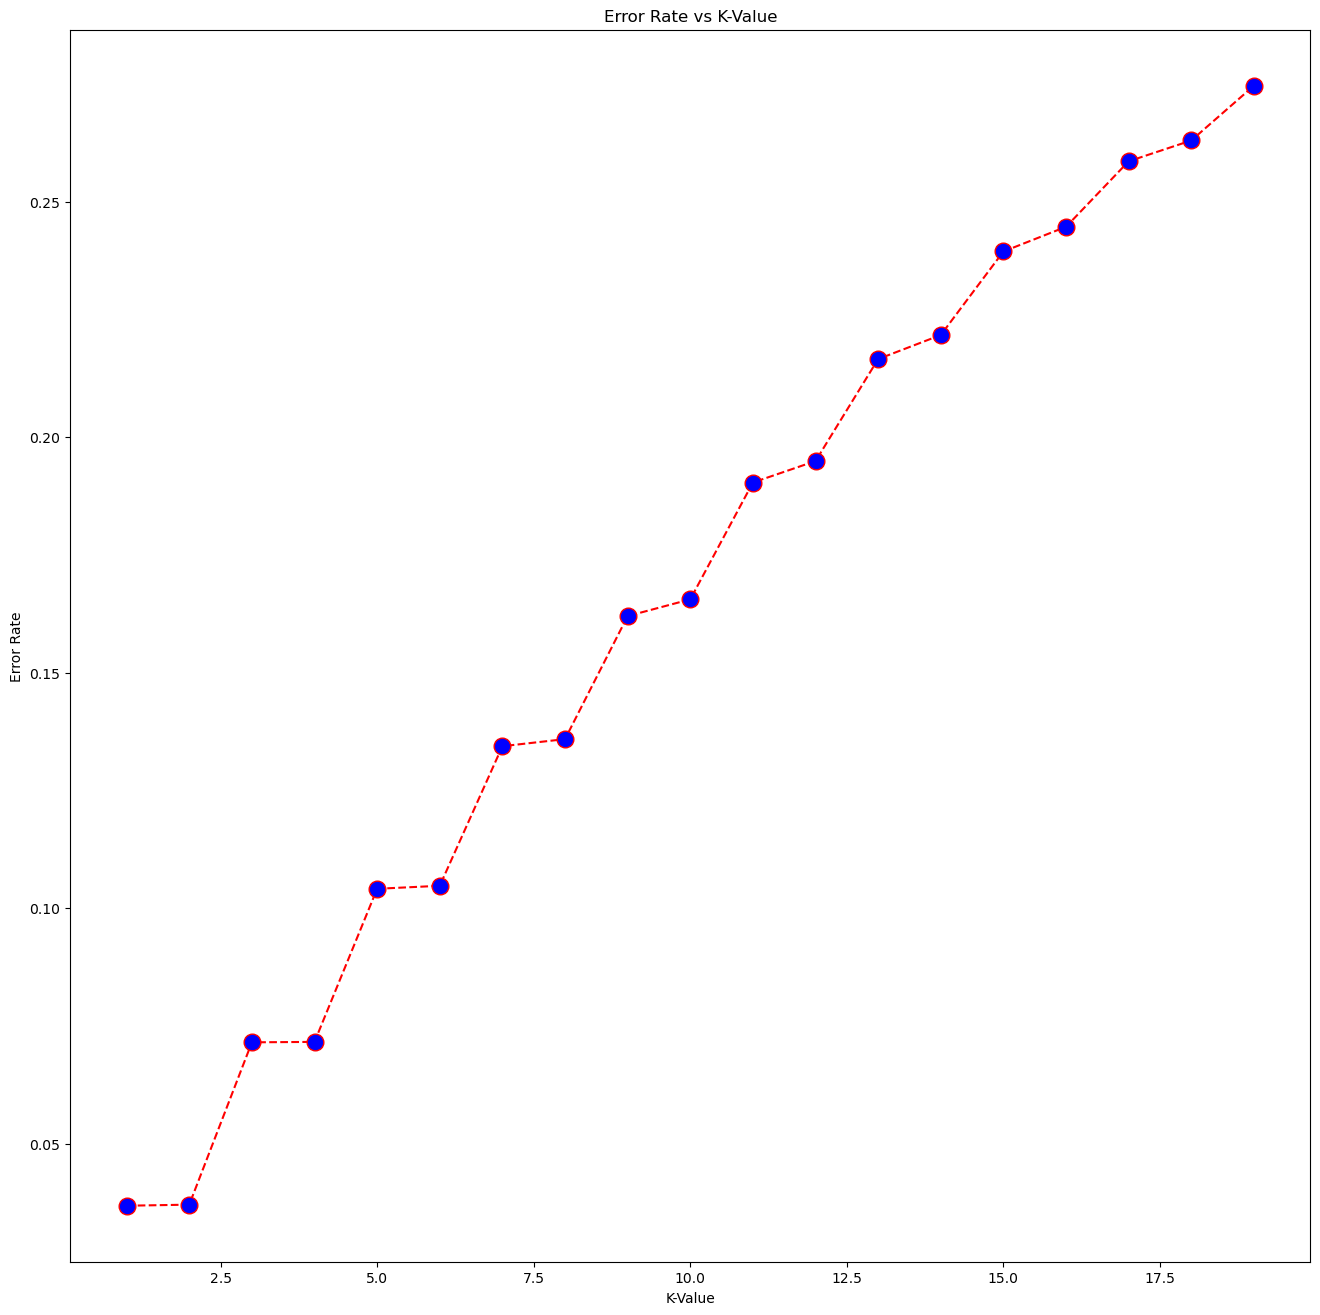

In [66]:
plt.figure(figsize=(16,16))
plt.plot(range(1,20), error_rate, color = 'red', linestyle = 'dashed', marker ='o', markersize =  12, markerfacecolor = 'blue')
plt.title("Error Rate vs K-Value")
plt.xlabel("K-Value")
plt.ylabel("Error Rate")
plt.show()

In [67]:
# We'll go for k=2

In [83]:
from sklearn.neighbors import KNeighborsClassifier
model0 = KNeighborsClassifier(n_neighbors=2)
knn2 = model0.fit(x_pca, y_train)

y_predknn1 = model0.predict(x_pca_test)
y_pred_trainknn1 = model0.predict(x_pca)

In [84]:
print("For Test")
print(classification_report(y_test, y_predknn1))

print("For Train")
print(classification_report(y_train, y_pred_trainknn1))

For Test
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     11006
           1       0.93      1.00      0.96     10932

    accuracy                           0.96     21938
   macro avg       0.97      0.96      0.96     21938
weighted avg       0.97      0.96      0.96     21938

For Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43838
           1       1.00      1.00      1.00     43912

    accuracy                           1.00     87750
   macro avg       1.00      1.00      1.00     87750
weighted avg       1.00      1.00      1.00     87750



In [70]:
# k=3 is giving high accuracy and least variance between training and testing data.

In [85]:
c_matrix = confusion_matrix(y_test, y_predknn1)
c_matrix

array([[10198,   808],
       [    5, 10927]], dtype=int64)

[]

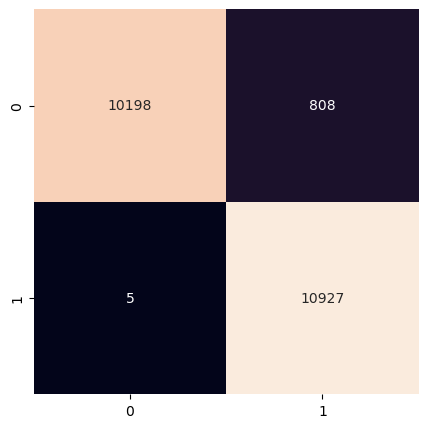

In [86]:
fig, ax = plt.subplots(figsize=(8,5))
c_matrix = confusion_matrix(y_test, y_predknn1)
nam = np.unique(y_predknn1)
sns.heatmap(c_matrix, square = True, annot = True, fmt = 'd', cbar = False, xticklabels=nam, yticklabels=nam)
plt.plot()

In [73]:
# 10198 True Positives, 10927 True Negatives, 808 False Positives and 5 False Negatives. 

# Tuning hyperparameters for xg-boost

In [74]:
from sklearn.model_selection import RandomizedSearchCV
paramgrid1 = {'max_depth': [2,15], 'max_leaf_nodes':[2,30], 'n_estimators':[10,30]}

xgb1 = XGBClassifier(random_state=77)
grid1 = RandomizedSearchCV(xgb1, paramgrid1, cv=10)
grid1.fit(x_pca, y_train)
grid1.best_params_

{'n_estimators': 30, 'max_leaf_nodes': 2, 'max_depth': 15}

In [75]:
# Creating xgb model using these parameters to see if results get any better

In [76]:
xgb2 = XGBClassifier(n_estimators=30, max_leaf_nodes= 2, max_depth = 15)
xgbc = xgb2.fit(x_pca, y_train)

y_predxgbc = xgb2.predict(x_pca_test)
y_pred_trainxgbc = xgb2.predict(x_pca)

In [77]:
print("For test")
print(classification_report(y_test, y_predxgbc))

print("For train")
print(classification_report(y_train, y_pred_trainxgbc))

For test
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11006
           1       0.91      1.00      0.96     10932

    accuracy                           0.95     21938
   macro avg       0.96      0.95      0.95     21938
weighted avg       0.96      0.95      0.95     21938

For train
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     43838
           1       0.97      1.00      0.98     43912

    accuracy                           0.98     87750
   macro avg       0.98      0.98      0.98     87750
weighted avg       0.98      0.98      0.98     87750



In [78]:
# On tuning the hyperparameters for xgb classifier, we are getting very good results.
# High performance and very low variance.

In [79]:
#Plotting confusion matrix
c_mat = confusion_matrix(y_test, y_predxgbc)
c_mat

array([[ 9979,  1027],
       [    2, 10930]], dtype=int64)

[]

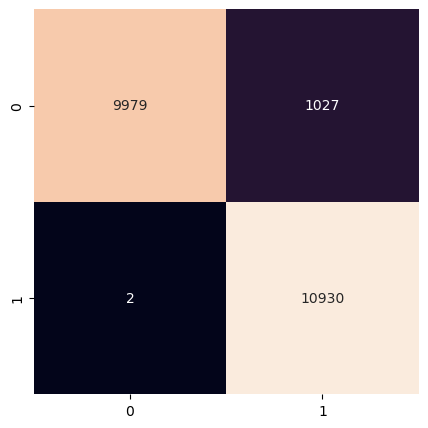

In [80]:
fig1, ax1 = plt.subplots(figsize=(8,5))
namm = np.unique(y_predxgbc)
sns.heatmap(c_mat, square= True, annot = True, fmt = 'd', cbar = False, xticklabels=namm, yticklabels=namm)
plt.plot()

In [81]:
# 10049 True Positives, 10927 True Negatives, 957 False Positives and 5 False Negatives

# We can go with XG-Boost Classifier since it's overall performance is the best among all of the models.

   # THE END. 